# Event Log Comparison

Compare simulated_log_Nico.xes with the latest simulated log from integration/output

In [27]:
import pm4py
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

## 1. Load Event Logs

In [1]:
# Load Nico's simulated log
log_nico = pm4py.read_xes('simulated_log_Nico.xes')
df_nico = pm4py.convert_to_dataframe(log_nico)
print(f"Nico's Log: {len(df_nico)} events, {df_nico['case:concept:name'].nunique()} cases")

# Load latest simulated log from integration/output
output_dir = Path('integration/output')

# Try XES first, then CSV
xes_files = list(output_dir.glob('simulated_log*.xes'))
csv_files = list(output_dir.glob('simulated_log_*.csv'))

if xes_files:
    latest_sim_file = max(xes_files, key=lambda p: p.stat().st_mtime)
    log_sim = pm4py.read_xes(str(latest_sim_file))
    df_sim = pm4py.convert_to_dataframe(log_sim)
    print(f"Latest Simulation: {len(df_sim)} events, {df_sim['case:concept:name'].nunique()} cases")
    print(f"File: {latest_sim_file.name}")
elif csv_files:
    latest_sim_file = max(csv_files, key=lambda p: p.stat().st_mtime)-

SyntaxError: invalid syntax (551938641.py, line 20)

## 2. Basic Statistics Comparison

In [2]:
def get_log_statistics(df, name):
    stats = {
        'Log': name,
        'Total Events': len(df),
        'Total Cases': df['case:concept:name'].nunique(),
        'Unique Activities': df['concept:name'].nunique(),
        'Avg Events per Case': len(df) / df['case:concept:name'].nunique(),
    }
    
    # Case duration statistics
    df['time:timestamp'] = pd.to_datetime(df['time:timestamp'], format='mixed')
    case_durations = df.groupby('case:concept:name')['time:timestamp'].agg(['min', 'max'])
    case_durations['duration_hours'] = (case_durations['max'] - case_durations['min']).dt.total_seconds() / 3600
    
    stats['Avg Case Duration (hours)'] = case_durations['duration_hours'].mean()
    stats['Median Case Duration (hours)'] = case_durations['duration_hours'].median()
    
    return stats

stats_nico = get_log_statistics(df_nico.copy(), "Nico's Log")
stats_list = [stats_nico]

if df_gt is not None:
    stats_gt = get_log_statistics(df_gt.copy(), "Ground Truth")
    stats_list.append(stats_gt)

if df_sim is not None:
    stats_sim = get_log_statistics(df_sim.copy(), "Latest Simulation")
    stats_list.append(stats_sim)

comparison_df = pd.DataFrame(stats_list)
display(comparison_df)

NameError: name 'df_nico' is not defined

## 3. Activity Frequency Comparison


Activity Frequency Comparison:


,Nico's Log,Ground Truth,Latest Simulation
concept:name,,,
A_Accepted,17.0,10.0,10.0
A_Cancelled,3.0,4.0,6.0
A_Complete,9.0,10.0,10.0
A_Concept,19.0,10.0,10.0
A_Create Application,10.0,10.0,10.0
A_Denied,3.0,2.0,2.0
A_Incomplete,9.0,6.0,1.0
A_Pending,6.0,4.0,2.0
A_Submitted,4.0,10.0,6.0


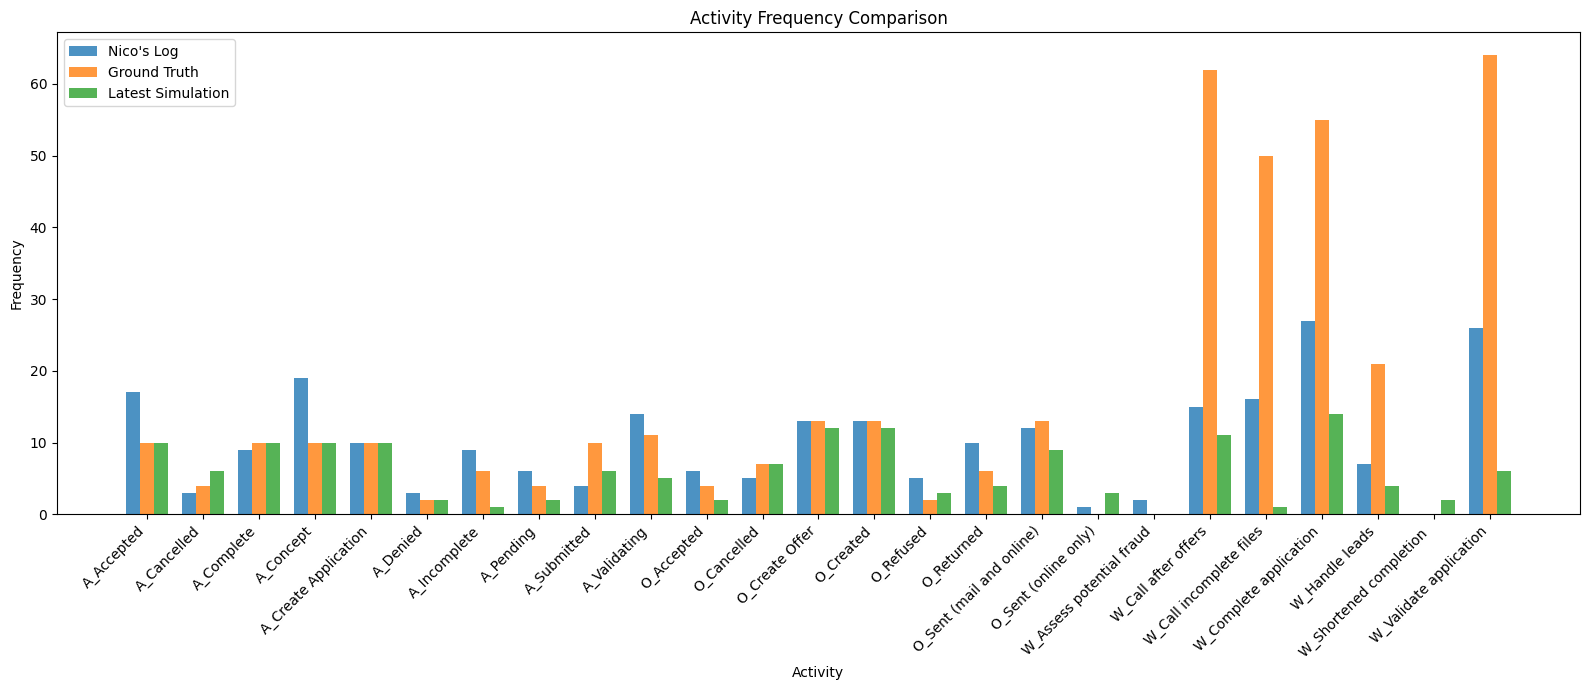

In [30]:
# Activity frequencies
activity_freq_nico = df_nico['concept:name'].value_counts().sort_index()

comparison_dfs = {"Nico's Log": activity_freq_nico}

if df_gt is not None:
    activity_freq_gt = df_gt['concept:name'].value_counts().sort_index()
    comparison_dfs['Ground Truth'] = activity_freq_gt

if df_sim is not None:
    activity_freq_sim = df_sim['concept:name'].value_counts().sort_index()
    comparison_dfs['Latest Simulation'] = activity_freq_sim

# Combine into one DataFrame
activity_comparison = pd.DataFrame(comparison_dfs).fillna(0)

print("\nActivity Frequency Comparison:")
display(activity_comparison)

# Visualization
fig, ax = plt.subplots(figsize=(16, 7))
x = np.arange(len(activity_comparison))
width = 0.25
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

for i, (col, color) in enumerate(zip(activity_comparison.columns, colors)):
    offset = (i - len(activity_comparison.columns)/2 + 0.5) * width
    ax.bar(x + offset, activity_comparison[col], width, label=col, alpha=0.8, color=color)

ax.set_xlabel('Activity')
ax.set_ylabel('Frequency')
ax.set_title('Activity Frequency Comparison')
ax.set_xticks(x)
ax.set_xticklabels(activity_comparison.index, rotation=45, ha='right')
ax.legend()
plt.tight_layout()
plt.show()

## 4. Variant Analysis

In [20]:
# Get process variants
def get_variants(df, name):
    log = pm4py.convert_to_event_log(df)
    variants = pm4py.get_variants(log)
    
    print(f"\n{name}:")
    print(f"Total unique variants: {len(variants)}")
    print(f"\nTop 10 variants:")
    
    sorted_variants = sorted(variants.items(), key=lambda x: len(x[1]), reverse=True)[:10]
    for i, (variant, cases) in enumerate(sorted_variants, 1):
        print(f"{i}. {variant} ({len(cases)} cases)")
    
    return variants

variants_nico = get_variants(df_nico, "Nico's Log")
if df_gt is not None:
    variants_gt = get_variants(df_gt, "Ground Truth")
if df_sim is not None:
    variants_sim = get_variants(df_sim, "Latest Simulation")


Nico's Log:
Total unique variants: 10

Top 10 variants:
1. ('A_Create Application', 'A_Concept', 'A_Accepted', 'A_Submitted', 'A_Concept', 'A_Accepted', 'O_Create Offer', 'O_Created', 'O_Sent (mail and online)', 'W_Complete application', 'W_Call after offers', 'A_Complete', 'W_Validate application', 'A_Validating', 'O_Returned', 'W_Validate application', 'O_Accepted', 'A_Pending', 'W_Validate application', 'O_Cancelled') (1 cases)
2. ('A_Create Application', 'W_Complete application', 'A_Concept', 'W_Complete application', 'A_Accepted', 'O_Create Offer', 'O_Created', 'O_Sent (mail and online)', 'W_Complete application', 'W_Call after offers', 'W_Assess potential fraud', 'W_Handle leads', 'W_Handle leads', 'A_Concept', 'A_Accepted', 'O_Create Offer', 'O_Created', 'O_Sent (mail and online)', 'W_Call after offers', 'A_Complete', 'W_Validate application', 'A_Validating', 'O_Returned', 'W_Call incomplete files', 'W_Validate application', 'W_Call incomplete files', 'A_Incomplete', 'W_Validat

## 5. DFG Comparison (Side by Side)

In [21]:
# Convert to event logs for PM4Py
log_nico_pm4py = pm4py.convert_to_event_log(df_nico)
dfg_nico, start_nico, end_nico = pm4py.discover_dfg(log_nico_pm4py)
print(f"Nico's Log: {len(dfg_nico)} DFG edges")

if df_gt is not None:
    log_gt_pm4py = pm4py.convert_to_event_log(df_gt)
    dfg_gt, start_gt, end_gt = pm4py.discover_dfg(log_gt_pm4py)
    print(f"Ground Truth: {len(dfg_gt)} DFG edges")

if df_sim is not None:
    log_sim_pm4py = pm4py.convert_to_event_log(df_sim)
    dfg_sim, start_sim, end_sim = pm4py.discover_dfg(log_sim_pm4py)
    print(f"Latest Simulation: {len(dfg_sim)} DFG edges")

Nico's Log: 74 DFG edges
Ground Truth: 47 DFG edges
Latest Simulation: 46 DFG edges


Nico's Log DFG:


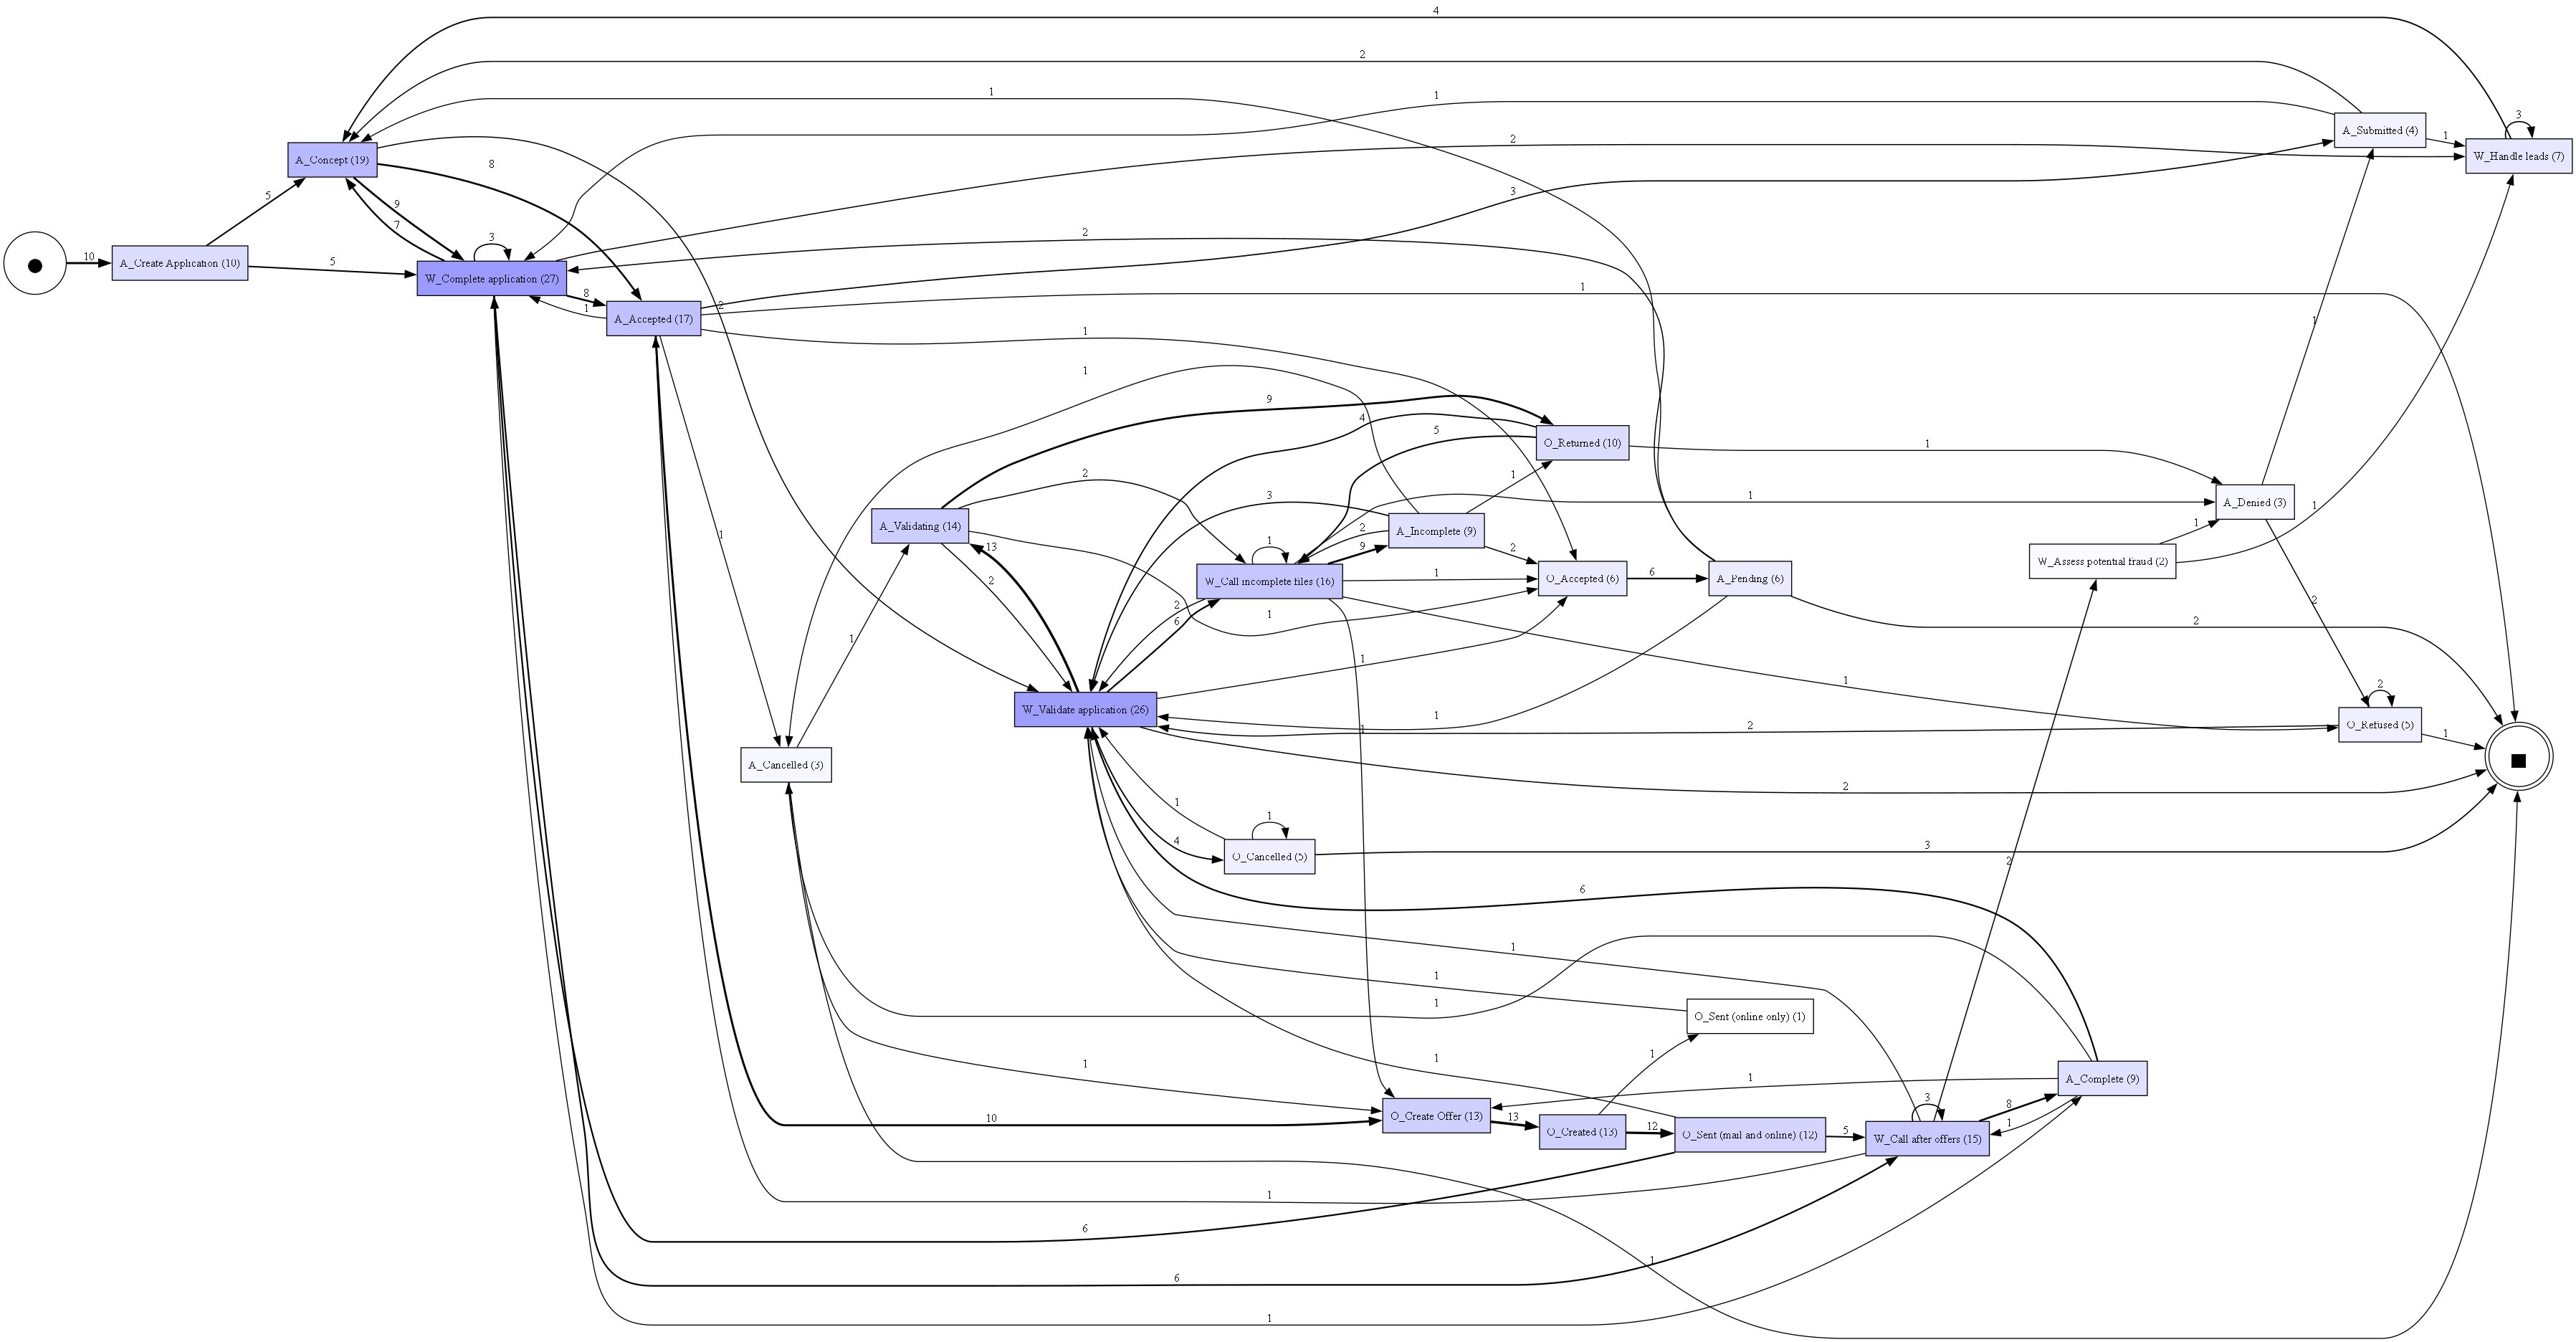

In [22]:
# Visualize Nico's DFG
print("Nico's Log DFG:")
pm4py.view_dfg(dfg_nico, start_nico, end_nico)

Ground Truth DFG:


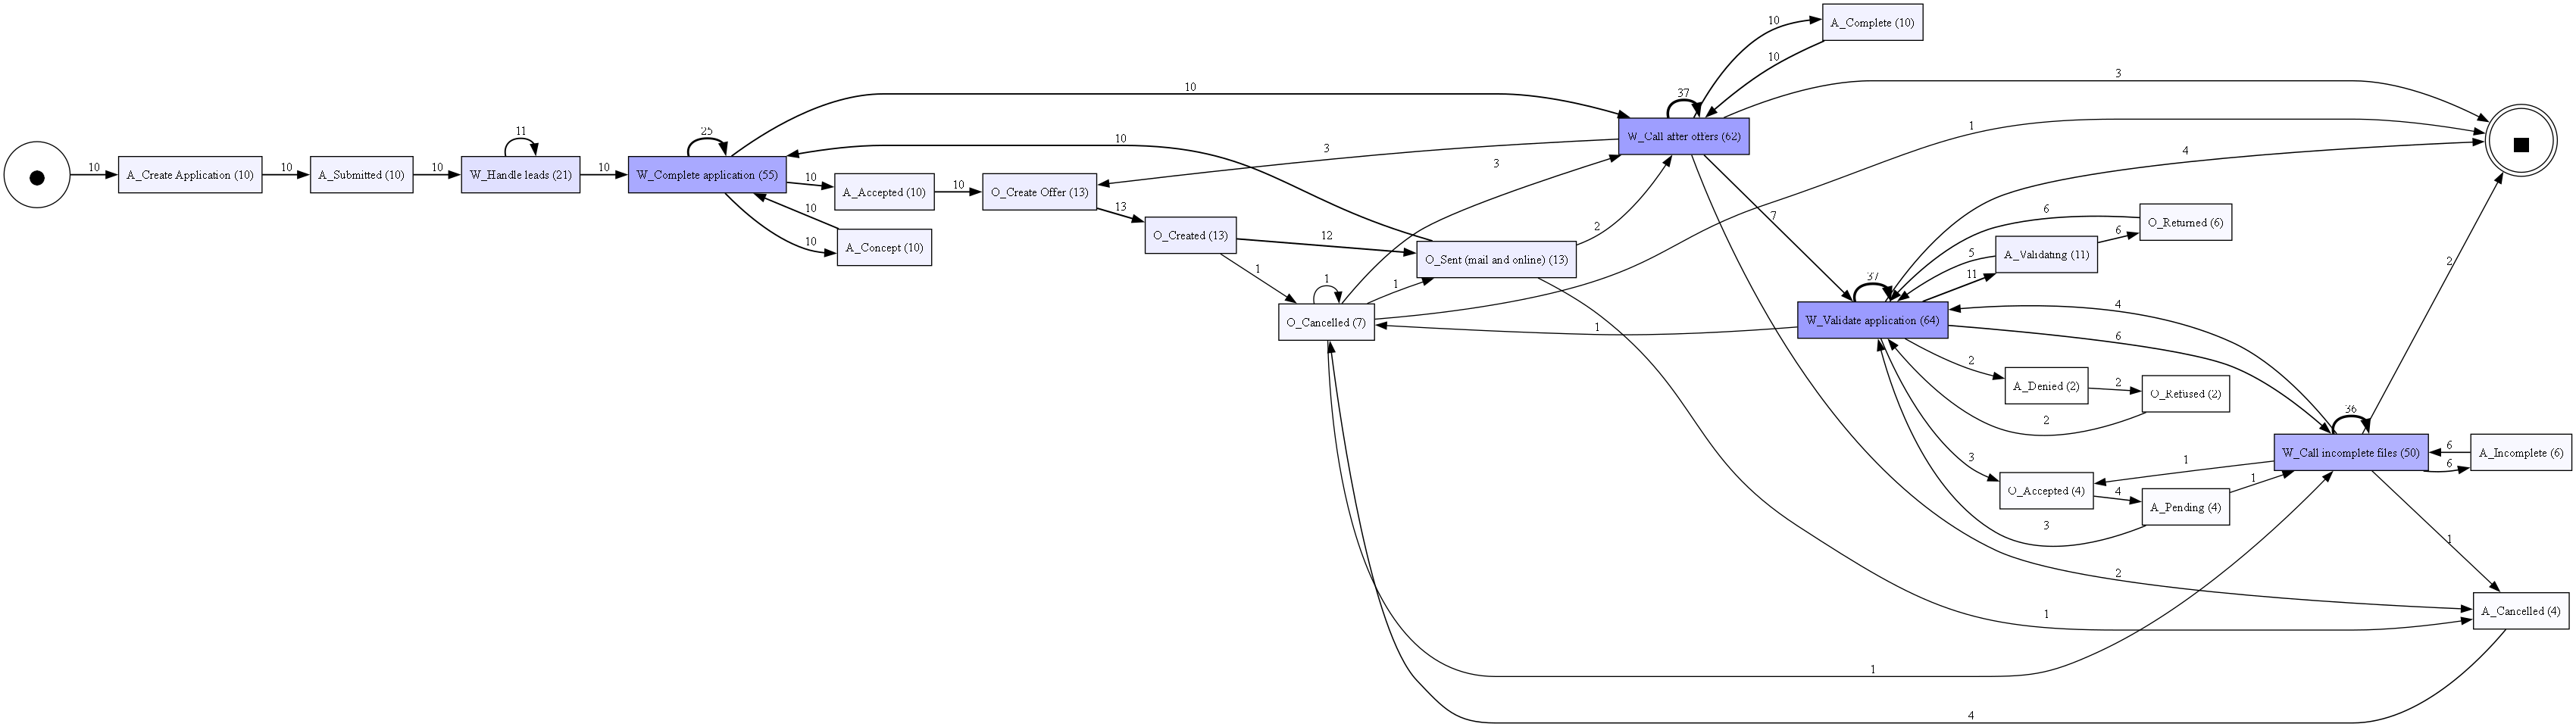

In [14]:
# Visualize Ground Truth DFG
if df_gt is not None:
    print("Ground Truth DFG:")
    pm4py.view_dfg(dfg_gt, start_gt, end_gt)

Latest Simulation DFG:


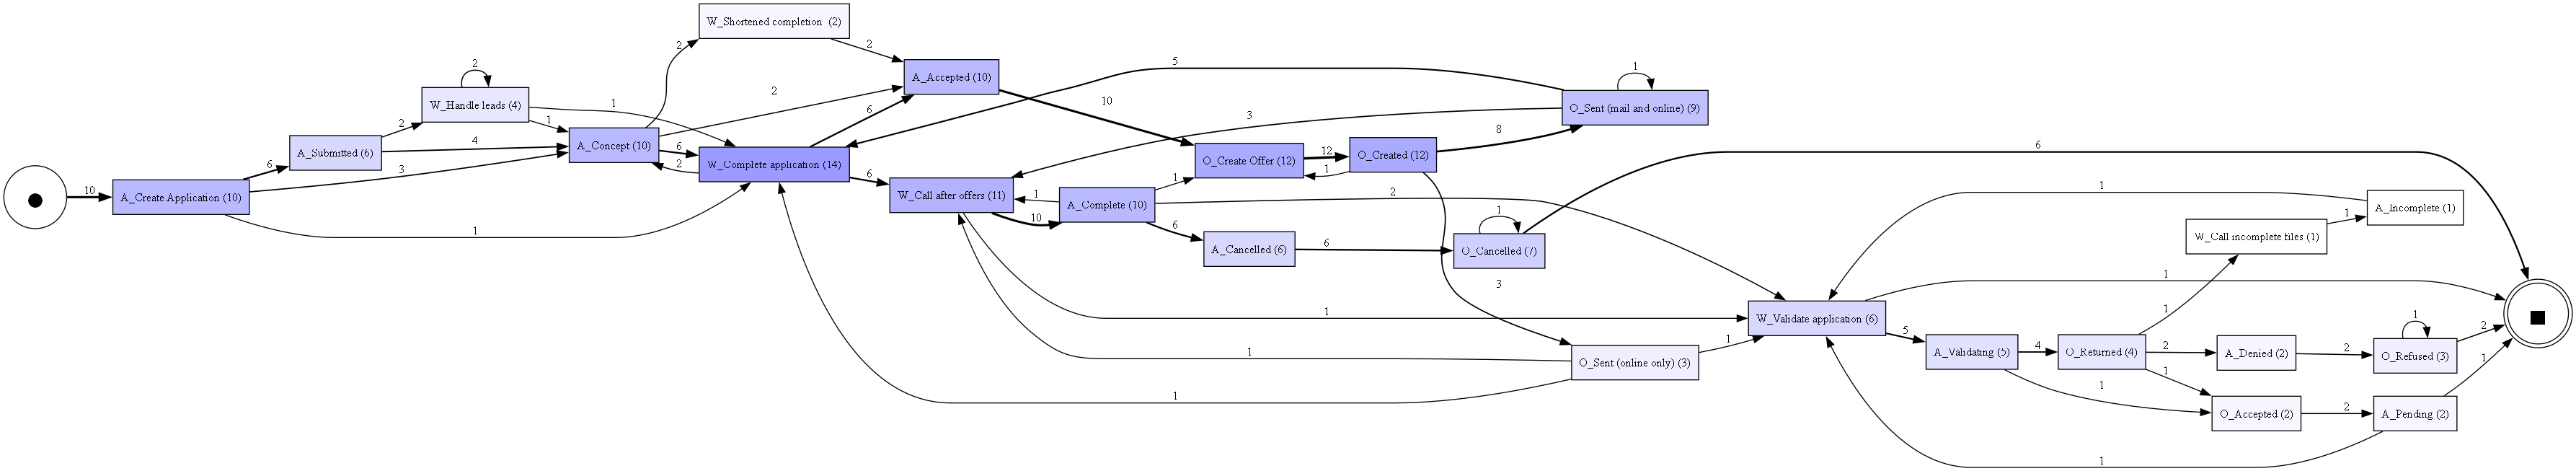

In [15]:
# Visualize Latest Simulation DFG
if df_sim is not None:
    print("Latest Simulation DFG:")
    pm4py.view_dfg(dfg_sim, start_sim, end_sim)

## 6. Edge Comparison (DFG Edges)

In [16]:
# Compare DFG edges across all logs
all_edges = set(dfg_nico.keys())
if df_gt is not None:
    all_edges |= set(dfg_gt.keys())
if df_sim is not None:
    all_edges |= set(dfg_sim.keys())

edge_comparison = []
for edge in sorted(all_edges):
    freq_nico = dfg_nico.get(edge, 0)
    row = {
        'From': edge[0],
        'To': edge[1],
        "Nico's Freq": freq_nico,
    }
    
    if df_gt is not None:
        freq_gt = dfg_gt.get(edge, 0)
        row['GT Freq'] = freq_gt
        row['Nico vs GT Diff'] = freq_nico - freq_gt
    
    if df_sim is not None:
        freq_sim = dfg_sim.get(edge, 0)
        row['Sim Freq'] = freq_sim
        row['Sim vs Nico Diff'] = freq_sim - freq_nico
        
        if df_gt is not None:
            row['Sim vs GT Diff'] = freq_sim - freq_gt
    
    edge_comparison.append(row)

edge_df = pd.DataFrame(edge_comparison)

print("\nDFG Edge Frequency Comparison:")
display(edge_df.head(30))

# Show edges with biggest differences (Sim vs GT if available, else Sim vs Nico)
if df_gt is not None and df_sim is not None:
    print("\nEdges with largest absolute differences (Simulation vs Ground Truth):")
    display(edge_df.sort_values('Sim vs GT Diff', key=abs, ascending=False).head(20))
elif df_sim is not None:
    print("\nEdges with largest absolute differences (Simulation vs Nico):")
    display(edge_df.sort_values('Sim vs Nico Diff', key=abs, ascending=False).head(20))


DFG Edge Frequency Comparison:


,From,To,Nico's Freq,GT Freq,Nico vs GT Diff,Sim Freq,Sim vs Nico Diff,Sim vs GT Diff
0,A_Accepted,A_Cancelled,1,0,1,0,-1,0
1,A_Accepted,A_Submitted,3,0,3,0,-3,0
2,A_Accepted,O_Accepted,1,0,1,0,-1,0
3,A_Accepted,O_Create Offer,10,10,0,10,0,0
4,A_Accepted,W_Complete application,1,0,1,0,-1,0
5,A_Cancelled,A_Validating,1,0,1,0,-1,0
6,A_Cancelled,O_Cancelled,0,4,-4,6,6,2
7,A_Cancelled,O_Create Offer,1,0,1,0,-1,0
8,A_Complete,A_Cancelled,1,0,1,6,5,6
9,A_Complete,O_Create Offer,1,0,1,1,0,1



Edges with largest absolute differences (Simulation vs Ground Truth):


,From,To,Nico's Freq,GT Freq,Nico vs GT Diff,Sim Freq,Sim vs Nico Diff,Sim vs GT Diff
94,W_Validate application,W_Validate application,0,37,-37,0,0,-37
69,W_Call after offers,W_Call after offers,3,37,-34,0,-3,-37
77,W_Call incomplete files,W_Call incomplete files,1,36,-35,0,-1,-36
83,W_Complete application,W_Complete application,3,25,-22,0,-3,-25
10,A_Complete,W_Call after offers,1,10,-9,1,0,-9
86,W_Handle leads,W_Complete application,0,10,-10,1,1,-9
87,W_Handle leads,W_Handle leads,3,11,-8,2,-1,-9
81,W_Complete application,A_Concept,7,10,-3,2,-5,-8
32,A_Submitted,W_Handle leads,1,10,-9,2,1,-8
8,A_Complete,A_Cancelled,1,0,1,6,5,6


## 7. Time-based Analysis

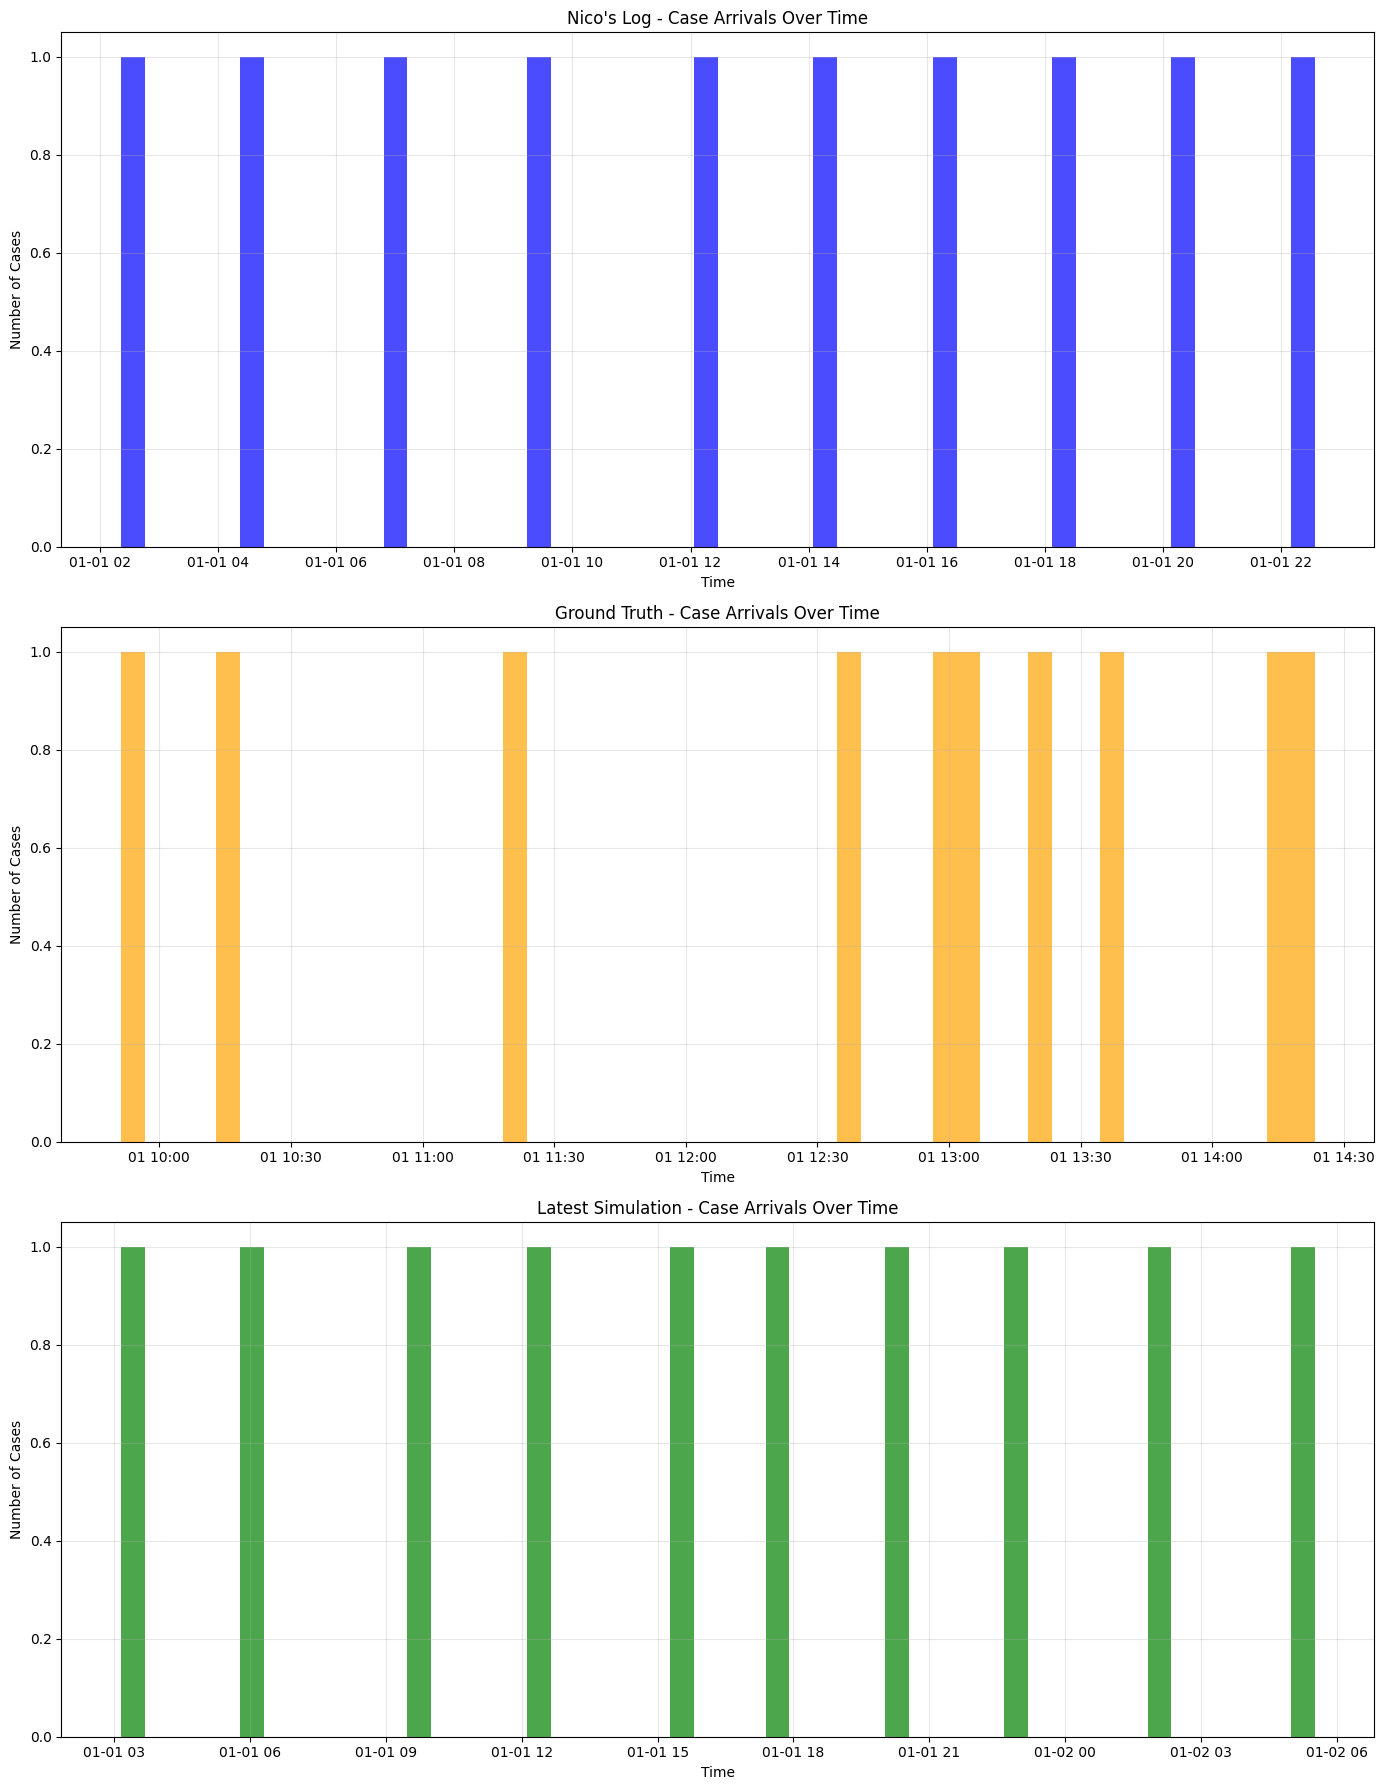

In [33]:
# Case arrivals over time
df_nico_time = df_nico.copy()
df_nico_time['time:timestamp'] = pd.to_datetime(df_nico_time['time:timestamp'], format='mixed')
arrivals_nico = df_nico_time.groupby('case:concept:name')['time:timestamp'].min()

# Count how many plots we need
num_plots = 1
if df_gt is not None:
    num_plots += 1
if df_sim is not None:
    num_plots += 1

fig, axes = plt.subplots(num_plots, 1, figsize=(14, 6 * num_plots))
if num_plots == 1:
    axes = [axes]

plot_idx = 0

# Nico's log
arrivals_nico.hist(bins=50, ax=axes[plot_idx], alpha=0.7, color='blue')
axes[plot_idx].set_title("Nico's Log - Case Arrivals Over Time")
axes[plot_idx].set_xlabel('Time')
axes[plot_idx].set_ylabel('Number of Cases')
axes[plot_idx].grid(True, alpha=0.3)
plot_idx += 1

# Ground Truth
if df_gt is not None:
    df_gt_time = df_gt.copy()
    df_gt_time['time:timestamp'] = pd.to_datetime(df_gt_time['time:timestamp'], format='mixed')
    arrivals_gt = df_gt_time.groupby('case:concept:name')['time:timestamp'].min()
    
    arrivals_gt.hist(bins=50, ax=axes[plot_idx], alpha=0.7, color='orange')
    axes[plot_idx].set_title('Ground Truth - Case Arrivals Over Time')
    axes[plot_idx].set_xlabel('Time')
    axes[plot_idx].set_ylabel('Number of Cases')
    axes[plot_idx].grid(True, alpha=0.3)
    plot_idx += 1

# Latest simulation
if df_sim is not None:
    df_sim_time = df_sim.copy()
    df_sim_time['time:timestamp'] = pd.to_datetime(df_sim_time['time:timestamp'], format='mixed')
    arrivals_sim = df_sim_time.groupby('case:concept:name')['time:timestamp'].min()
    
    arrivals_sim.hist(bins=50, ax=axes[plot_idx], alpha=0.7, color='green')
    axes[plot_idx].set_title('Latest Simulation - Case Arrivals Over Time')
    axes[plot_idx].set_xlabel('Time')
    axes[plot_idx].set_ylabel('Number of Cases')
    axes[plot_idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [38]:
# Calculate processing times per activity using PM4Py
def calculate_processing_times(df, name):
    """Calculate processing times between consecutive events in each case using PM4Py."""
    # Convert to event log
    event_log = pm4py.convert_to_event_log(df)
    
    # Calculate time differences between consecutive events
    processing_times = {}
    
    for trace in event_log:
        for i in range(1, len(trace)):
            prev_event = trace[i-1]
            curr_event = trace[i]
            
            activity = curr_event['concept:name']
            time_diff = (curr_event['time:timestamp'] - prev_event['time:timestamp']).total_seconds() / 3600
            
            if activity not in processing_times:
                processing_times[activity] = []
            processing_times[activity].append(time_diff)
    
    # Calculate statistics per activity
    activity_times = []
    for activity, times in processing_times.items():
        activity_times.append({
            'Activity': activity,
            'count': len(times),
            'mean': np.mean(times),
            'median': np.median(times),
            'std': np.std(times),
            'min': np.min(times),
            'max': np.max(times)
        })
    
    result_df = pd.DataFrame(activity_times).set_index('Activity').round(2)
    
    print(f"\n{name} - Processing Times per Activity (hours):")
    print(f"Total transitions with timing data: {sum(len(times) for times in processing_times.values())}")
    
    return result_df

# Calculate for all logs
proc_times_nico = calculate_processing_times(df_nico, "Nico's Log")
proc_times_dict = {"Nico": proc_times_nico}

if df_gt is not None:
    proc_times_gt = calculate_processing_times(df_gt, "Ground Truth")
    proc_times_dict["GT"] = proc_times_gt

if df_sim is not None:
    proc_times_sim = calculate_processing_times(df_sim, "Latest Simulation")
    proc_times_dict["Sim"] = proc_times_sim

# Get top activities by frequency for visualization
top_activities = proc_times_nico.sort_values('count', ascending=False).head(10).index.tolist()

# Display top activities by frequency
print("\n" + "="*80)
print("Processing Times Comparison - Top 15 Activities (sorted by count)")
print("="*80)

if len(proc_times_dict) > 1:
    # Find common activities
    common_activities = set(proc_times_dict["Nico"].index)
    for times_df in proc_times_dict.values():
        common_activities &= set(times_df.index)
    
    # Display comparison for common activities
    for activity in sorted(common_activities, key=lambda x: proc_times_dict["Nico"].loc[x, 'count'], reverse=True)[:15]:
        print(f"\n{activity}:")
        for log_name, times_df in proc_times_dict.items():
            if activity in times_df.index:
                row = times_df.loc[activity]
                print(f"  {log_name:8s}: count={row['count']:4.0f}, mean={row['mean']:6.2f}h, median={row['median']:6.2f}h, std={row['std']:6.2f}h")


Nico's Log - Processing Times per Activity (hours):
Total transitions with timing data: 242

Ground Truth - Processing Times per Activity (hours):
Total transitions with timing data: 377

Latest Simulation - Processing Times per Activity (hours):
Total transitions with timing data: 142

Processing Times Comparison - Top 15 Activities (sorted by count)

W_Complete application:
  Nico    : count=  27, mean= 13.51h, median= 13.03h, std=  6.41h
  GT      : count=  55, mean=  4.92h, median=  0.01h, std=  9.97h
  Sim     : count=  14, mean= 17.02h, median= 13.99h, std= 10.40h

W_Validate application:
  Nico    : count=  26, mean= 13.15h, median= 12.78h, std=  6.63h
  GT      : count=  64, mean=  2.62h, median=  0.01h, std=  9.66h
  Sim     : count=   6, mean= 10.47h, median= 10.44h, std=  7.24h

A_Concept:
  Nico    : count=  19, mean= 24.42h, median= 22.42h, std= 13.86h
  GT      : count=  10, mean=  0.00h, median=  0.00h, std=  0.00h
  Sim     : count=  10, mean=  9.91h, median=  9.83h, s

## 7b. Processing Time Analysis

## 8. Summary Report

In [18]:
print("="*70)
print("EVENT LOG COMPARISON SUMMARY")
print("="*70)
print(f"\nNico's Log: {len(df_nico)} events, {df_nico['case:concept:name'].nunique()} cases")

if df_gt is not None:
    print(f"Ground Truth: {len(df_gt)} events, {df_gt['case:concept:name'].nunique()} cases")
    
if df_sim is not None:
    print(f"Latest Simulation: {len(df_sim)} events, {df_sim['case:concept:name'].nunique()} cases")

# Compare with Ground Truth if available
if df_gt is not None and df_sim is not None:
    case_diff_gt = df_sim['case:concept:name'].nunique() - df_gt['case:concept:name'].nunique()
    event_diff_gt = len(df_sim) - len(df_gt)
    print(f"\nSimulation vs Ground Truth: {case_diff_gt:+d} cases, {event_diff_gt:+d} events")

# Activity coverage
activities_nico = set(df_nico['concept:name'].unique())
all_activities = [("Nico's Log", activities_nico)]

if df_gt is not None:
    activities_gt = set(df_gt['concept:name'].unique())
    all_activities.append(("Ground Truth", activities_gt))
    
if df_sim is not None:
    activities_sim = set(df_sim['concept:name'].unique())
    all_activities.append(("Latest Simulation", activities_sim))

# Find common activities across all logs
common = set.intersection(*[act for _, act in all_activities])
print(f"\nActivities in all logs: {len(common)}")

# Show unique activities per log
for name, activities in all_activities:
    others = set.union(*[act for n, act in all_activities if n != name])
    unique = activities - others
    if unique:
        print(f"Activities only in {name}: {unique}")

print("\n" + "="*70)

EVENT LOG COMPARISON SUMMARY

Nico's Log: 252 events, 10 cases
Ground Truth: 387 events, 10 cases
Latest Simulation: 152 events, 10 cases

Simulation vs Ground Truth: +0 cases, -235 events

Activities in all logs: 22
Activities only in Nico's Log: {'W_Assess potential fraud'}
Activities only in Latest Simulation: {'W_Shortened completion '}

